# Reinforcement Learning Notes

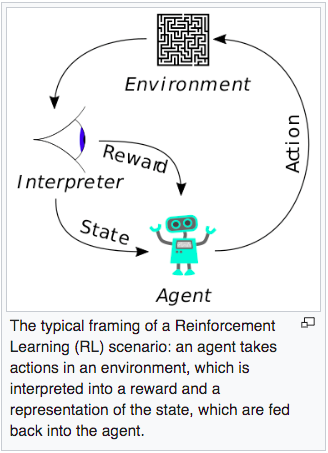

- A Reward $R_t$ is a scalar feedback signal that indicates how well an agent is doing at step $t$.
- The Agent's job is to maximize the cumulative reward
- Reinforcement Learning is based on the reward hypothesis:
    All goals can be described by the maximization of expected cumulative reward

- Elements are Actions ($A_t$), Rewards ($R_t$), and observations ($O_t$)
- History is the sequence of actions, observations, and rewards

$$H_t = A_1, O_1, R_1, ... A_t, O_t, R_t$$

- The environment state ($S^e_t$) is the environment's private representation
- The Agent state ($S^a_t$) is the agent's internal representation, and can be any function of the history
$$S_t^a = f(H_t)$$

State $S_t$ is Markov if and only if the probability of the next state $\mathbb{P}$ satisfies
$$\mathbb{P}[S_{t+1}|S_t] = \mathbb{P}[S_{t+1}|S_1, S_2, ... S_t]$$

- Full observability vs Partial Observability: Agent directly or indirectly observes environment state


An RL agent may include one or more of these components:
- Policy: agents behavior function
- Value Function: How good is each state and/or action
- Model: Agent's represenation of the environment

Value function is a prediction of future reward
$$v_{\pi}(s) = \mathbb{E}_{\pi}[R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} +.... | S_t = s]$$
Where $\mathbb{E}$ is expectation value

- A model predicts what the environment will do next
- Transitions $\mathcal{P}$ predicts the next state
- Rewards: $\mathcal{R}$ predicts the next (immediate) reward

For example:
$$\mathcal{P}^a_{ss'} = \mathbb{P}[S'=s'|S=s, A=a]$$
$$\mathcal{R}_s^a = \mathbb{E}[R|S=s, A=a]$$

$\mathcal{P}^a_{ss'}$ represents the probability of transitioning from state $s$ to $s'$ given action $a$

State transition marix
$$\mathcal{P} = 
\begin{bmatrix}
    \mathcal{P}_{11} & \mathcal{P}_{12} & \dots  & \mathcal{P}_{1n} \\
    \mathcal{P}_{21} & \mathcal{P}_{22} & \dots  & \mathcal{P}_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    \mathcal{P}_{m1} & \mathcal{P}_{m2} & \dots  & \mathcal{P}_{mn}
\end{bmatrix}
$$

## Markov Process (MP)
a memoryless random process, ie a sequence of random states $S_1$, $S_2$ ... with the Markov property

- Markov Process (or Markov chain) is a tuple ($\mathcal{S}$, $\mathcal{P}$)
- $\mathcal{S}$ is a (finite) set of states
- $\mathcal{P}$ is a state transition probability matrix

## Markov Reward Process (MRP)
A Markov chain with values

- Markov Reward Process is a tuple ($\mathcal{S}$, $\mathcal{P}$, $\mathcal{R}$, $\gamma$)
- $\mathcal{S}$ is a (finite) set of states
- $\mathcal{P}$ is a state transition probability matrix
- $\mathcal{R}$ is a reward function $\mathcal{R}_s = \mathbb{E}[R_{t+1}|S_t=s]$
- $\gamma$ is a discount factor, $\gamma \in [0, 1]$

The return $G_t$ is the total discounted reward from time-step t
$$ G_t = R_{t+1} + \gamma R_{t+2} + ... = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1} $$

- The value function $v(s)$ gives the long-term value of state $s$
- The state value function $v(s)$ of an MRP is the expected return starting from state $s$
$$ v(s) = \mathbb{E}[G_t | S_t = s] $$

The value function can be decomposed into two parts
- immediate reward $R_{t+1}$
- discounted value of successor state $\gamma v(S_{t+1})$
$$ v(s) = \mathbb{E}[G_t|S_t=s] = \mathbb{E}[R_{t+1} + \gamma v(S_{t+1}) | S_t=s] $$

## Bellman Equation

$$
\begin{bmatrix}
    v(1) \\
    v(2) \\
    \vdots \\
    v(n)
\end{bmatrix}
=
\begin{bmatrix}
    \mathcal{R}_1 \\
    \mathcal{R}_2 \\
    \vdots \\
    \mathcal{R}_n
\end{bmatrix}
+ \gamma
\begin{bmatrix}
    \mathcal{P}_{11} & \mathcal{P}_{12} & \dots  & \mathcal{P}_{1n} \\
    \mathcal{P}_{21} & \mathcal{P}_{22} & \dots  & \mathcal{P}_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    \mathcal{P}_{m1} & \mathcal{P}_{m2} & \dots  & \mathcal{P}_{mn}
\end{bmatrix}
\begin{bmatrix}
    v(1) \\
    v(2) \\
    \vdots \\
    v(n)
\end{bmatrix}
$$

Or simply

$$ v = \mathcal{R} + \gamma \mathcal{P} v $$

and solving for $v$ gives

$$ v = (I - \gamma \mathcal{P})^{-1} \mathcal{R} $$

## Markov Decision Process (MDP)
A Markov decision process is a Markov Reward process with decisions. It is an environment in which all states are Markov

- Markov Decision Process is a tuple ($\mathcal{S}$, $\mathcal{A}$,  $\mathcal{P}$, $\mathcal{R}$, $\gamma$)
- $\mathcal{S}$ is a (finite) set of states
- $\mathcal{A}$ is a finite set of actions
- $\mathcal{P}$ is a state transition probability matrix
- $\mathcal{P}^a_{ss'} = \mathbb{P}[S_{t+1}=s'|S_t=s, A_t=a]$
- $\mathcal{R}$ is a reward function $\mathcal{R}^a_s = \mathbb{E}[R_{t+1}|S_t=s, A_t=a]$
- $\gamma$ is a discount factor, $\gamma \in [0, 1]$

A policy is a distribution over actions given states
$$ \pi(a|s) = \mathbb{P}[A_t=a|S_t=s] $$
A policy fully determines the behavior of an agent
MDP policies depend on the current state (not the History)

- Given an MDP $\mathcal{M}$ = ($\mathcal{S}$, $\mathcal{A}$,  $\mathcal{P}$, $\mathcal{R}$, $\gamma$) and a policy $\pi$
- The state sequence $S_1$, $S_2$, ... is a Markov process
($\mathcal{S}$, $\mathcal{P}^{\pi}$)
- The state and reward sequence $S_1$, $R_1$, $S_2$, $R_2$, ...
is a Markov reward process
($\mathcal{S}$, $\mathcal{P}^{\pi}$, $\mathcal{R}^{\pi}$, $\gamma$) where
$$ \mathcal{P}^{\pi}_{s,s'} = \sum_{a \in \mathcal{A}} \pi(a|s) \mathcal{P}^a_{s,s'} $$
$$ \mathcal{R}_s^{\pi} = \sum_{a \in \mathcal{A}} \pi(a|s) \mathcal{R}_s^a $$

### Definitions
- The _state-value function_ $v_{\pi}(s)$ of an MDP is the expected return starting from state $s$ and then following policy $\pi$
$$ v_{\pi}(s) = \mathbb{E}_{\pi}[G_t|S_t=s] $$
- The _action-value function_ $q_{\pi}(s,a)$ is the expected return starting from state s, taking action a, and then following policy $\pi$
$$ q_{\pi}(s, a) = \mathbb{E}_{\pi}[G_t|S_t=s, A_t=a] $$

## Bellman Expectation Equations

The state-value function can again be decomposed into immediate reward plus discounted value of sucessor state
$$ v_{\pi}(s) = \mathbb{E}_{\pi}[R_{t+1} + \gamma v_{\pi}(S_{t+1}) | S_t=s] $$
The action-value function can similarly be decomposed
$$ q_{\pi}(s, a) = \mathbb{E}_{\pi}[R_{t+1} + \gamma q_{\pi}(S_{t+1}, A_{t+a}) | S_t=s, A_t=a] $$
$$ = \mathbb{E}_{\pi}[R_{t+1} + \gamma v_{\pi}(S_{t+1}) | S_t=s, A_t=a]  $$

$$ v_{\pi}(s) = \sum_{a \in \mathcal{A}} \pi(a|s) q_{\pi}(s, a) $$
$$ q_{\pi}(s, a) = \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \ v_{\pi}(s') $$
Putting these togetger, can yield
$$ v_{\pi}(s) = \sum_{a \in \mathcal{A}} \pi(a|s) \bigg( \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \ v_{\pi}(s') \bigg) $$
$$ q_{\pi}(s, a) = \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \ 
\sum_{a' \in \mathcal{A}} \pi(a'|s') q_{\pi}(s', a')$$

Clearly

$$ v_{\pi} = \mathcal{R}^{\pi} + \gamma \mathcal{P}^{\pi} v_{\pi} $$

and solving for $v_{\pi}$ gives

$$ v_{\pi} = (I - \gamma \mathcal{P}^{\pi})^{-1} \mathcal{R}^{\pi} $$

## Optimal Value Function

### Definitions
- The _optimal state-value function_ $v_*(s)$ is the maximum value function over all policies
$$ v_*(s) = \underset{\pi}{\mathrm{max}} \ v_{\pi}(s) $$
- The _optimal action-value function_ $q_*(s,a)$ is the maximum action-value function over all policies
$$ q_*(s,a) = \underset{\pi}{\mathrm{max}} \ q_{\pi}(s,a) $$

- The optimal value function specifies the best possible performance in the MDP
- The MDP is "solved" when we know the optimal value function

## Optimal Policies

Define a partial ordering over policies

$ \pi >= \pi'$ if $v_{\pi}(s)>=v_{\pi'}(s), \forall s$
### Theorem
For any Markov decision process
- There exists an optimal policy $\pi_*$ that is better than or equal to all over policies
$\pi_* >= \pi, \forall \pi$
- All optimal policies achieve the optimal value function $v_{\pi_*}(s) = v_*(s)$
- All optimal policies achieve the optimal action-value function $q_{\pi_*}(s, a) = q_*(s,a)$

An optimal policy can be found by maximising over $q_{\pi}(s,a)$
$$ \pi_*(a|s) = 
     \begin{cases}
       1 \ \ \mathrm{if} \ \ a = \underset{a \in \mathcal{A}}{\mathrm{argmax}} \ q_*(s,a) \\
       0 \ \ \mathrm{otherwise} \\
     \end{cases}$$
- There is always a deterministic optimal policy for any MDP
- If we know $q_*(s,a)$, we immediately have the optimal policy

### Bellman Optimality Equation for $v_*$
$$ v_*(s) = \underset{a}{\mathrm{max}} \ q_*(s,a) $$
$$ = \underset{a}{\mathrm{max}} \bigg[ \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \ v_*(s') \bigg] $$
$$  $$

### Bellman Optimality Equation for $q_*$

$$ q_*(s,a) =  \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \ v_*(s') $$
$$ q_*(s,a) =  \mathcal{R}_s^a + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}_{ss'}^a \ \underset{a'}{\mathrm{max}} \ q_*(s',a') $$
$$  $$

* Bellman Optimality Equation is non-linear
* Generally no closed form solution
* Many iterative solution methods
    * Value Iteration
    * Policy Iteration
    * Q-learning
    * Sarsa

## Finding $v(s)$: Bellman expectation backup

* Problem: evaluate a given policy $\pi$
* Solution: iterative application of Bellman expectation backup
* $v_1 \rightarrow v_2 \rightarrow \ldots \rightarrow v_*$
* Using synchronous backups
    * At each iteration $k+1$
    * For all states $s \in \mathcal{S}$
    * Update v_{k+1}(s) from v_k(s')
    * where s' is a successor state of s
* We will discuss asynchronous backups later
* Convergence to $v_\pi$ will be proven at the end of lecture

### Synchronous backups
$$ v^{k+1} = \mathcal{R}^{\pi} + \gamma \mathcal{P}^{\pi} v^k $$
until $v$ doesnt change

## Policy Iteration

* Given a policy $\pi$
    * evaluate policy $\pi$ (solve for $v_{\pi}$)
    * improve the policy by acting greedily with respect to $v_{\pi}$
$$ \pi' = \mathrm{greedy}(v_{\pi}) $$
* This policy of _policy iteration_ always converges to $\pi*$

So in the above paradigm, you start with a random policy, find $v$ for that policy, update the policy to act greedily with respect to that $v$, and repeat.

* Consider a deterministic policy $a = \pi(s)$
* we can improve the policy by acting greedily
$$ \pi'(s) = \underset{a \in \mathcal{A}}{\mathrm{argmax}} \ q_{\pi}(s,a) $$
* This improves the value from any state s over one step
$$ q_{\pi}(s, \pi'(s)) = \underset{a \in \mathcal{A}}{\mathrm{max}} \ q_{\pi}(s,a)
 \geq q_{\pi}(s,\pi(s)) = v_{\pi}(s) $$
* It therefore improves the value function $v_{\pi'}(s) \geq v_{\pi}(s)$, as seen from the recursion below
$$ v_{\pi}(s) \leq q_{\pi}(s,\pi'(s)) = 
\mathbb{E}_{\pi'}[R_{t+1} + \gamma v_{\pi}(S_{t+1}) | S_t=s] $$

$$ = \mathbb{E}_{\pi'}[R_{t+1} + \gamma q_{\pi}(S_{t+1}, \pi(S_{t+1})) | S_t=s] $$

$$ \leq \mathbb{E}_{\pi'} [R_{t+1} + \gamma q_{\pi}(S_{t+1}, \pi'(S_{t+1})) | S_t=s] $$

$$ = \mathbb{E}_{\pi'}[R_{t+1} + \gamma R_{t+2} + \gamma v_{\pi}(S_{t+2}) | S_t=s] $$
$$ \leq \mathbb{E}_{\pi'} [R_{t+1} + \gamma R_{t+2} + \ldots | S_t = s] = v_{\pi'}(s) $$
* If improvements, stop
$$ q_{\pi}(s, \pi'(s)) = \underset{a \in \mathcal{A}}{\mathrm{max}} \ q_{\pi}(s,a)
 = q_{\pi}(s,\pi(s)) = v_{\pi}(s)$$
 * Then the Bellman optimality equation has been satisfied
 $$ v_{\pi}(s) = \underset{a \in \mathcal{A}}{\mathrm{max}} \ q_{\pi} (s,a) $$
* Therefore, $v_{\pi}(s) = v_{*}(s) \ \forall s \in \mathcal{S}$

## Value Iteration

* Any optimal policy can be subdivided into two components:
    * An optimal first action $A_*$
    * Followed by an optimal policy from successor state $S'$

### Theorem (Principle of Optimality)
A policy $\pi(a|s)$ achieves the optimal value from state $s$, $v_{\pi}(s) = v_*(s)$ if and only if:

For any state $s'$ reachable from $s$, $\pi$ achieves the optimal value from state $s'$
$$ v_{\pi}(s') = v_*(s') $$

* If we know the solution to subproblems $v_*(s')$
* Then solution $v_*(s)$ can be found by one step lookahead
$$ v_*(s) \leftarrow \underset{a \in \mathcal{A}}{\mathrm{max}} \ \bigg[ \mathcal{R}_s^a
 + \gamma \sum_{s' \in \mathcal{S}} \mathcal{P}^a_{ss'} \ v_*(s') \bigg] $$
* The idea of value iteration is to apply these updates iteratively
* Intuition: start with final rewards, work backwards
* Still works with loopy, stochastic MDPs

* Problem: find optimal policy $\pi$
* Solution: iterative application of Bellman optimality backup
* $v_1 \rightarrow v_2 \rightarrow \ldots \rightarrow v_*$
* using synchronous backups
    * At each iteration $k+1$
    * for all states $s \in \mathcal{S}$
    * update $v_{k+1}(s)$ from $v_k(s')$
* convergence to $v_*$ will be proven later
* unlike policy iteration, there is no explicit policy
* Intermediate value functions may not correspond to any policy

$$ v_{k+1} = \underset{a \in \mathcal{A}}{\mathrm{max}} \ [\mathcal{R}^a + \gamma \mathcal{P}^a v_k] $$

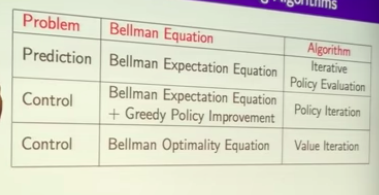
* Algorithms are based on state-value function $v_{\pi}(s)$ or $v_*(s)$
* Complexity $O(m n^2)$ per iteration, for m actions and n states
* Could also apply to action-value function $q_{\pi}(s,a)$ or $q_{*}(s,a)$
* Complexity $O(m^2 n^2) per iteration

## Extensions to Dynamic Programming

* DP methods described so far used synchronous backups
* ie all states are backed up in parallel
* Asynchronous DP backs up states individually, in any order
* For each selected state, apply the appropriate backup
* Can significantly reduce computation
* Guaranteed to converge if all states continue to be selected